In [1]:
#import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

In [28]:
#import files containing final sentiment scores and engagement metrics
df_sentiment = pd.read_excel('S:/ERP Raw Data/pien/THESIS/final_sentiment.xlsx')
df_engagement = pd.read_csv('S:/ERP Raw Data/pien/THESIS/Final_Engagement.csv') 
df_engagement = df_engagement.rename(columns= {'channel' : 'channel_name'})

In [8]:
#merge dataframes
df = df_sentiment.merge(df_engagement, on='channel_name', how='inner' )

In [12]:
#split dataframe into topic groups
df_ukraine = df[df['topic'] == 'ukraine']
df_covid = df[df['topic'] == 'covid']
df_mixed = df[df['topic'] == 'mixed']

In [22]:
#define correlation variables
x_cor = df['average_sent']
y1_cor = df['relative_forwards']
y2_cor = df['relative_views']

In [27]:
#run Pearson's and Spearman's correlation
print(scipy.stats.pearsonr(x_cor, y1_cor))
print(scipy.stats.pearsonr(x_cor, y2_cor))
print(scipy.stats.spearmanr(x_cor, y1_cor))
print(scipy.stats.spearmanr(x_cor, y2_cor))  


PearsonRResult(statistic=-0.0712498556829644, pvalue=0.7858225898541809)
PearsonRResult(statistic=-0.10347281478463873, pvalue=0.6926976940340406)
SignificanceResult(statistic=-0.2303921568627451, pvalue=0.3736648667172987)
SignificanceResult(statistic=-0.14215686274509806, pvalue=0.586262862651232)


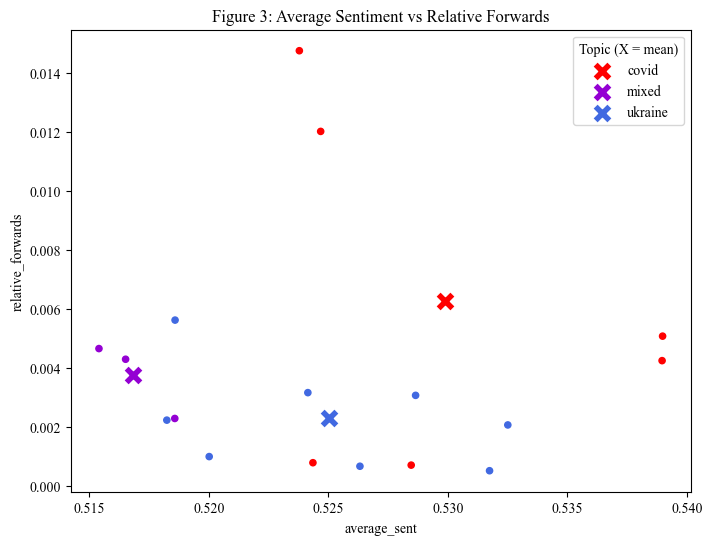

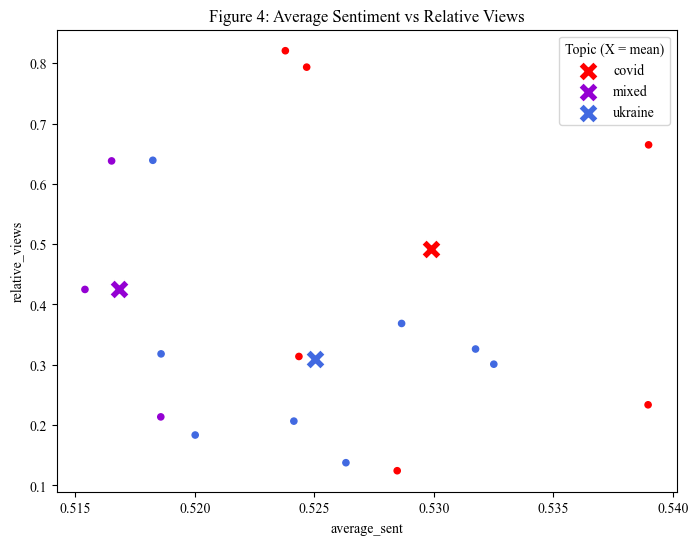

In [26]:
#visualize average sentiment score versus relative views, and average sentiment scores versus relative forwards. 
plt.rcParams['font.family'] = 'Times New Roman'
topic_colors = {'ukraine': 'royalblue', 'covid': 'red', 'mixed': 'darkviolet'}
colors = df['topic'].map(topic_colors)

ax1 = df.plot.scatter(x='average_sent', y='relative_forwards', c=colors, figsize=(8,6))

topic_means = df.groupby('topic', as_index=False).agg({
    'average_sent': 'mean',
    'relative_forwards': 'mean',
    'relative_views': 'mean'
})

for _, row in topic_means.iterrows():
    ax1.scatter(row['average_sent'], row['relative_forwards'],
                color=topic_colors[row['topic']], 
                edgecolor='white', s=200, marker='X', label=row['topic'])

ax1.set_title("Figure 3: Average Sentiment vs Relative Forwards")
ax1.legend(title="Topic (X = mean)")

plt.savefig('scatterplot_forw.png', bbox_inches='tight')
plt.show()


ax2 = df.plot.scatter(x='average_sent', y='relative_views', c=colors, figsize=(8,6))

for _, row in topic_means.iterrows():
    ax2.scatter(row['average_sent'], row['relative_views'],
                color=topic_colors[row['topic']], 
                edgecolor='white', s=200, marker='X', label=row['topic'])

ax2.set_title("Figure 4: Average Sentiment vs Relative Views")
ax2.legend(title="Topic (X = mean)")

plt.savefig('scatterplot_view.png', bbox_inches='tight')
plt.show()
